# U.S. Medical Insurance Costs

## This notebook aims to conduct an exploratory analysis of the US medical insurance dataset and display it graphically.

### Import modules

In [4]:
import csv
import math
import matplotlib.pyplot as plt

### Create separate lists for each variable

In [6]:
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

In [7]:
# Function to load csv data
def load_list_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst

load_list_data(age, 'insurance.csv', "age")
load_list_data(sex, 'insurance.csv', "sex")
load_list_data(bmi, 'insurance.csv', "bmi")
load_list_data(children, 'insurance.csv', "children")
load_list_data(smoker, 'insurance.csv', "smoker")
load_list_data(region, 'insurance.csv', "region")
load_list_data(charges, 'insurance.csv', "charges")

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

### Calculate the class for patient analysis

In [9]:
class patientAnalysis:
    # Initialise the function
    def __init__(self, ages, sexes, bmis, num_children, smoker, regions, charges):
        self.ages = ages
        self.sexes = sexes
        self.bmis = bmis
        self.num_children = num_children
        self.smoker = smoker
        self.regions = regions
        self.charges = charges

    ## Calculating averages, minimums, and maximums in the data.
    
    # Calculate average, minimum, and maximum age
    def describeAge(self):
        # Initialise variables
        total_age = 0
        min_age = 100
        max_age = 0
        for age in self.ages:
            # Converts to integer
            age = int(age)
            # Totals up the age for average age
            total_age += age
            # Compares age against minimum and maximum ages
            if age < min_age:
                min_age = age
            elif age > max_age:
                max_age = age
            else:
                continue
        # Calculates average age
        average_age = round(total_age / len(self.ages), 0)
        # Returns values in strings for readability
        return "The average patient is " + str(average_age) + " years old. The youngest patient is " + str(min_age) + " years old. The oldest patient is " + str(max_age) + " years old."
        
    # Calculate average, minimum, and maximum BMI
    def describeBMI(self):
        # Initialise variables
        total_bmi = float(0)
        min_bmi = 100
        max_bmi = 9
        for bmi in self.bmis:
            bmi = float(bmi)
            # Totals up the BMI for average BMI
            total_bmi += bmi
            # Compares age against minimum and maximum ages
            if bmi < min_bmi:
                min_bmi = bmi
            elif bmi > max_bmi:
                max_bmi = bmi
            else:
                continue
        # Calculates average BMI
        average_bmi = round(total_bmi / len(self.bmis), 2)
        # Returns values in strings for readability
        return "The average patient BMI is " + str(average_bmi) + ". The lowest patient BMI is " + str(min_bmi) + ". The highest patient BMI is " + str(max_bmi) + "."

    # Calculate average insurance cost
    def describeCharge(self):
        # Initialise variables
        min_charge = 1000000
        max_charge = 0
        total_charges = 0
        for charge in self.charges:
            charge = float(charge)
            total_charges += charge
            # Compares age against minimum and maximum ages
            if charge < min_charge:
                min_charge = charge
            elif charge > max_charge:
                max_charge = charge
            else:
                continue
        average_charge = round(total_charges / len(self.charges), 2)
        return "The average annual cost per patient is $" + str(average_charge) + ". The lowest patient cost is " + str(min_charge) + ". The highest patient charge is " + str(max_charge) + "."

    # Display number of smokers
    def numSmokers(self):
        number_smokers = 0
        for status in self.smoker:
            if status == 'yes':
                number_smokers += 1
            else:
                continue
        percent_smokers = round(number_smokers / len(self.smoker), 2)
        return "There are " + str(number_smokers) + "in the database, consisting of " + str(percent_smokers) + " % of patients."

    def genderSplit(self):
        number_male = 0
        number_female = 0
        for gender in self.sexes:
            if gender == 'male':
                number_male += 1
            else:
                number_female += 1
        return "There are " + str(number_male) + " men and " + str(number_female) + " women in the database."
        
    ## Graphical displays of data
    
    # Graphically display the age range of patients
    def ageRange(self):
        young = 0
        twenties = 0
        thirties = 0
        forties = 0
        fifties = 0
        oldies = 0
        for age in self.ages:
            age = int(age)
            if age >= 60:
                oldies += 1
            elif age >= 50:
                fifties += 1
            elif age >= 40:
                forties += 1
            elif age >= 30:
                thirties += 1
            elif age >= 20:
                twenties += 1
            else:
                young += 1
        graph_x_axis = ["Under 20", "20 - 29", "30 - 39", "40 - 49", "50 - 59", "60 and over"]
        graph_y_axis = [young, twenties, thirties, forties, fifties, oldies]
        graph = plt.bar(graph_x_axis, graph_y_axis)
        plt.title("Number of Patients in each Age Range")
        return graph

    # Range in BMI
    def bmiRange(self):
        underweight = 0
        healthy = 0
        overweight = 0
        obese = 0
        for bmi in self.bmis:
            bmi = float(bmi)
            if bmi >= 30:
                obese += 1
            elif bmi >= 25:
                overweight += 1
            elif bmi >= 18.5:
                healthy += 1
            else:
                underweight += 1
        graph_x_axis = ["Underweight", "Healthy", "Overweight", "Obese"]
        graph_y_axis = [underweight, healthy, overweight, obese]
        graph = plt.bar(graph_x_axis, graph_y_axis)
        plt.title("Number of Patients in each BMI classification")
        return graph

    # Find unique regions
    def uniqueRegions(self):
        uniqueRegions = []
        for region in self.regions:
            if region not in uniqueRegions:
                uniqueRegions.append(region)
        return uniqueRegions
    # Find the number of people from each region
    def numRegions(self):
        southeast = 0
        southwest = 0
        northwest = 0
        northeast = 0
        for region in self.regions:
            if region == "southeast":
                southeast += 1
            elif region == "southwest":
                southwest += 1
            elif region == "northwest":
                northwest += 1
            else:
                northeast += 1
        graph_x_axis = ["South East", "South West", "North West", "North East"]
        graph_y_axis = [southeast, southwest, northwest, northeast]
        graph = plt.barh(graph_x_axis, graph_y_axis)
        plt.title("Number of Patients in each region")
        return graph

    # Find the rough distribution of charges
    def rangeCharges(self):
        lowest = 0
        five = 0
        ten = 0
        fifteen = 0
        twenty = 0
        thirty = 0
        highest = 0
        for charge in self.charges:
            charge = float(charge)
            if charge < 5000:
                lowest += 1
            elif charge < 10000:
                five += 1
            elif charge < 15000:
                ten += 1
            elif charge < 20000:
                fifteen += 1
            elif charge < 30000:
                twenty += 1
            elif charge < 40000:
                thirty += 1
            else:
                highest += 1
        # Graph of charges
        graph_x_axis = ["Below 5000", "5,000 - 9,999", "10,000 - 14,999", "15,000 - 19,999", "20,000 - 29,999", "30,000 - 39,999", "Over 40,000"]
        graph_y_axis = [lowest, five, ten, fifteen, twenty, thirty, highest]
        graph = plt.barh(graph_x_axis, graph_y_axis)
        plt.title("Number of patients in each charge range")
        return graph

    ## Estimating annual charges
    # Insurance cost
    def estimatedCosts(self):
        estimated_costs = []
        # Change smoker, region, and gender status to multipliers
        # Initialise variables
        smoker_multipliers = []
        region_multipliers = []
        gender_multipliers = []

        # Smoker status multipliers
        for status in self.smoker:
            if status == 'yes':
                smoker_multipliers.append(1)
            else:
                smoker_multipliers.append(0)

        # Gender multipliers
        for status in self.sexes:
            if status == 'male':
                gender_multipliers.append(1)
            else:
                gender_multipliers.append(0)

        # Region status multipliers
        for status in self.regions:
            if status == 'northeast':
                region_multipliers.append(1.75)
            elif status == 'southwest':
                region_multipliers.append(1.5)
            elif status == 'northwest':
                region_multipliers.append(1)
            else:
                region_multipliers.append(0.75)

        # Calculate insurance costs
        for item in range(len(region_multipliers)):
            estimated_cost = int(self.ages[item]) * float(self.bmis[item]) + 2000 * int(gender_multipliers[item]) + 4000 ** smoker_multipliers[item] + 500 * int(self.num_children[item]) + 300 ** float(region_multipliers[item])
            estimated_costs.append(estimated_cost)
        return estimated_costs
        
    # Calculating difference in insurance costs between hosts    
    def costDifference(self):
        estimated_costs = self.estimatedCosts()
        cost_differences = []
        for item in range(len(self.charges)):
            difference = round(float(estimated_costs[item]) - float(self.charges[item]),2)
            cost_differences.append(difference)
        return cost_differences

    # Import the cost differences for database purpose
    def newCostList(self):
        # Get list of cost differences
        estimated_costs = self.estimatedCosts()
        cost_differences = self.costDifference()
        unique_id = 0
        unique_id_list = []
        for item in range(len(self.ages)):
            unique_id += 1
            unique_id_list.append(unique_id)
        new_cost_list = dict((z[0], list(z[1:])) for z in zip(unique_id_list, self.ages, self.sexes, self.bmis, self.num_children, self.smoker, self.regions, estimated_costs, cost_differences))

        # Write dictionary to csv file
        with open('new_cost_list.csv', 'w') as csvfile:
            new_costs = csv.writer(csvfile)
            new_costs.writerow(new_cost_list.keys())
            new_costs.writerow(new_cost_list.values())
        return new_cost_list, unique_id_list

### Initialising the class for analysis

In [11]:
patient_analysis = patientAnalysis(age, sex, bmi, children, smoker, region, charges)

### Describe the data

In [13]:
# Age 
patient_analysis.describeAge()

'The average patient is 39.0 years old. The youngest patient is 18 years old. The oldest patient is 64 years old.'

In [14]:
# BMI
patient_analysis.describeBMI()

'The average patient BMI is 30.66. The lowest patient BMI is 15.96. The highest patient BMI is 53.13.'

In [15]:
# Charges
patient_analysis.describeCharge()

'The average annual cost per patient is $13270.42. The lowest patient cost is 1121.8739. The highest patient charge is 63770.42801.'

In [16]:
# Smokers
patient_analysis.numSmokers()

'There are 274in the database, consisting of 0.2 % of patients.'

In [17]:
# Gender Split
patient_analysis.genderSplit()

'There are 676 men and 662 women in the database.'

### Visualising the range of the data

<BarContainer object of 6 artists>

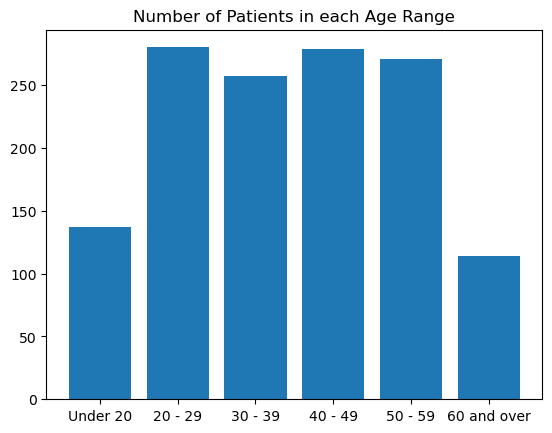

In [19]:
patient_analysis.ageRange()

<BarContainer object of 4 artists>

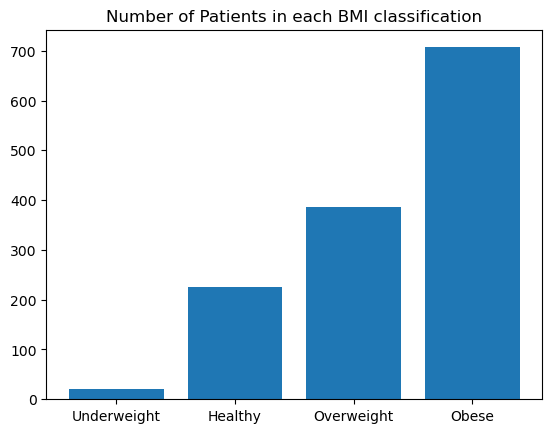

In [20]:
patient_analysis.bmiRange()

In [21]:
patient_analysis.uniqueRegions()

['southwest', 'southeast', 'northwest', 'northeast']

<BarContainer object of 4 artists>

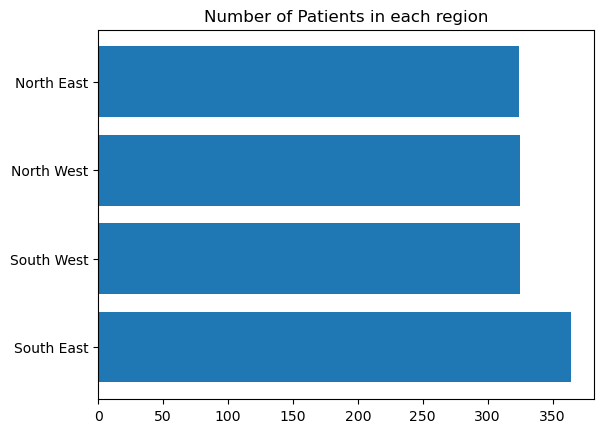

In [22]:
patient_analysis.numRegions()

<BarContainer object of 7 artists>

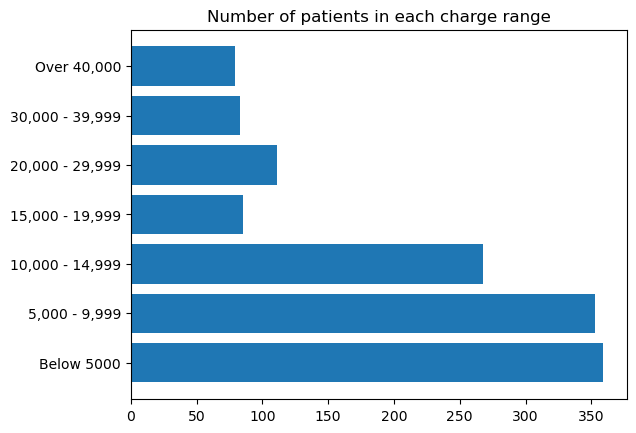

In [23]:
patient_analysis.rangeCharges()

### Estimating Insurance Costs for Next Year

In [25]:
patient_analysis.estimatedCosts()
patient_analysis.costDifference()

[-7158.67,
 1455.39,
 47.62,
 -18934.21,
 -641.7,
 -2885.6,
 -6129.27,
 -4454.13,
 19323.6,
 -27071.74,
 21560.48,
 -22106.66,
 6161.51,
 -8787.71,
 -32402.16,
 6327.32,
 12929.53,
 21779.57,
 -1148.43,
 -24582.31,
 10557.76,
 2519.42,
 1549.87,
 -10491.29,
 -1865.98,
 -10792.57,
 8628.82,
 -9165.01,
 425.66,
 -25389.55,
 -23606.22,
 19901.78,
 3552.76,
 -9685.57,
 -38479.21,
 1063.64,
 -11767.36,
 5435.65,
 -10365.52,
 -34583.21,
 19218.64,
 -2741.14,
 -2806.41,
 -4101.07,
 19454.53,
 -11381.63,
 19928.92,
 -2282.36,
 -11085.01,
 -30869.89,
 20056.42,
 -1572.6,
 -10528.12,
 -30431.01,
 -5111.08,
 -38053.1,
 10864.78,
 -26660.84,
 -17460.07,
 -3419.13,
 17696.57,
 409.92,
 -25784.82,
 -2606.46,
 -9963.34,
 4003.04,
 -5652.82,
 -2535.78,
 -4399.42,
 -9419.62,
 -11837.45,
 20210.34,
 -3555.27,
 -7516.96,
 1675.9,
 -7117.09,
 -2516.22,
 1286.74,
 19746.99,
 -4918.46,
 20518.52,
 15413.84,
 -29765.44,
 -6753.62,
 -28352.77,
 -12768.28,
 -37502.82,
 -4352.82,
 -6449.63,
 -9297.68,
 -1124.6,

### Taking cost differences into a new list

In [27]:
patient_analysis.newCostList()

({1: ['19',
   'female',
   '27.9',
   '0',
   'yes',
   'southwest',
   9726.252422706631,
   -7158.67],
  2: ['18',
   'male',
   '33.77',
   '1',
   'no',
   'southeast',
   3180.9443424240426,
   1455.39],
  3: ['28', 'male', '33', '3', 'no', 'southeast', 4497.084342424043, 47.62],
  4: ['33', 'male', '22.705', '0', 'no', 'northwest', 3050.265, -18934.21],
  5: ['32', 'male', '28.88', '0', 'no', 'northwest', 3225.16, -641.7],
  6: ['31',
   'female',
   '25.74',
   '0',
   'no',
   'southeast',
   871.0243424240425,
   -2885.6],
  7: ['46',
   'female',
   '33.44',
   '1',
   'no',
   'southeast',
   2111.3243424240422,
   -6129.27],
  8: ['37', 'female', '27.74', '3', 'no', 'northwest', 2827.38, -4454.13],
  9: ['37',
   'male',
   '29.83',
   '2',
   'no',
   'northeast',
   25730.012727212787,
   19323.6],
  10: ['60', 'female', '25.84', '0', 'no', 'northwest', 1851.4, -27071.74],
  11: ['25',
   'male',
   '26.22',
   '0',
   'no',
   'northeast',
   24281.802727212787,
   2156